# NGC 5904 Analysis - optical data

In [1]:
import matplotlib.pyplot as mp
import read_dao
import sys
import coordinates
import numpy as np
from matplotlib.ticker import ScalarFormatter
from astropy.wcs import WCS
from astropy.io import fits
import optical
import lightcurves
%matplotlib inline 

In [2]:
target = 'NGC5904'
folder = '/Volumes/Annie/CRRP/'+target+'/'
optical_dir = '/Volumes/Annie/CRRP/OpticalCatalogs/'
cluster_ra = '15:18:33.22'
cluster_dec = '02:04:51.7'

# Variable stars

In [21]:
# Find all stars identified as possible variables in optical catalog and list them in PeterIDs.txt

center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
optical.find_variables_fnl(optical_dir, target, center_ra, center_dec, data_dir=folder)

Reading optical catalog for NGC5904...
Reading optical catalog for NGC5904...
Finished reading optical catalog.


# Period Search

### Read in variables from Clement catalog

In [141]:
dtype1 = np.dtype([('id', 'S10'), ('period', float)])
data = np.loadtxt(folder+target+'-clement.txt', dtype=dtype1, usecols=(0,3))

datasets, colors = optical.compile_datasets(folder, old=0, returnColors=True)

 

Datasets:

  1      Y1005  10487 2010-05-03 2010-05-07 k
  2        wfi   6662 2000-04-22 2000-07-12 r
  3        pwm   3396 1994-04-21 1994-04-27 b
  4     not017   3216 2001-07-09 2001-07-15 g
  5  susi99may   3019 1999-05-15 1999-05-15 m
  6       cf94   3004 1994-06-05 1994-06-05 c
  7      andi4   1969 2008-04-19 2008-05-10 xkcd:brown
  8    int1704   1819 2017-04-03 2017-04-06 xkcd:coral
  9     hannah   1750 2002-03-29 2002-03-29 xkcd:purple
 10       wfi6   1643 2002-02-19 2002-02-19 xkcd:maroon
 11     bond11   1563 1998-03-22 1998-03-23 xkcd:olive
 12        pac   1477 1990-06-26 1990-06-26 xkcd:tan
 13      wfi42   1446 2000-04-01 2000-04-02 xkcd:grey
 14      bond9   1405 1997-05-08 1997-05-08 xkcd:teal
 15      B0707   1278 2007-03-12 2007-03-12 xkcd:tomato
 16       saic   1185 1992-05-25 1992-05-25 xkcd:orchid
 17      west2    912 2005-05-06 2005-05-07 xkcd:goldenrod
 18      int11    881 2011-08-21 2011-08-21 xkcd:orange
 19   soar0805    867 2008-05-21 2008-05-21 x

In [7]:
# Find periods for all stars in clement catalog

print '\n\nStar  Period_old  Period_new'

for ind, lcv in enumerate(data['id']):

# Open file to save periods
    if ind == 0:
        f_handle = open(folder+'periods.txt', 'w')
    else:
        f_handle = open(folder+'periods.txt', 'a')

    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    clement_period = data['period'][data['id'] == lcv]
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file)
        new_guess = lightcurves.period_search_LS(V, lcv, plot_save=1, data_dir=folder)
        new_period = lightcurves.period_search(V, new_guess, lcv, second_band=B, search_window=0.00005)

        print '%10s %0.4f %0.8f' % (lcv, clement_period, new_period)
        f_handle.write('%10s %0.4f %0.8f\n' % (lcv, clement_period, new_period))
        lightcurves.plot_phased_optical_lcv(U, B, V, R, I, new_period, lcv, datasets, plot_save=1,data_dir=folder, colors=colors)
    except:
        new_period = np.nan
        print '%10s %0.4f %0.8f' % (lcv, clement_period, new_period)
        f_handle.write('%10s %0.4f %0.8f\n' % (lcv, clement_period, new_period))

    # Close the periods file
    f_handle.close()



Star  Period_old  Period_new


/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/fromnumeric.py:2889: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/numpy/core/_methods.py:80: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


        V1 0.5218 0.20414413
        V2 0.5266 nan
        V3 0.6001 nan
        V4 0.4497 0.44960696
        V5 0.5458 0.54585021
        V6 0.5489 0.26942726
        V7 0.4944 0.49441194
        V8 0.5461 nan
        V9 0.6989 nan
       V10 0.5307 nan
       V11 0.5959 0.37001997
       V12 0.4677 0.46769957
       V13 0.5130 0.51313316
       V14 0.4872 0.49002259
       V15 0.3368 nan
       V16 0.6476 0.64763220
       V17 0.6014 0.60138838
       V18 0.4640 0.83133485
       V19 0.4699 nan
       V20 0.6096 nan
       V21 0.6049 nan
       V24 0.4785 0.91961022
       V25 0.5075 0.50754744
       V26 0.6226 0.40901691
       V27 0.4705 0.47030909
       V28 0.5439 0.35190740
       V29 0.4513 nan
       V30 0.5922 0.59217579
       V31 0.3006 nan
       V32 0.4578 nan
       V33 0.5016 0.50147594
       V34 0.5681 0.56815004
       V35 0.3082 0.23540085
       V36 0.6270 0.62772134
       V37 0.4888 0.48880068
       V38 0.4704 0.31656983
       V39 0.5890 0.58904239
       V40 

V142 0.4577


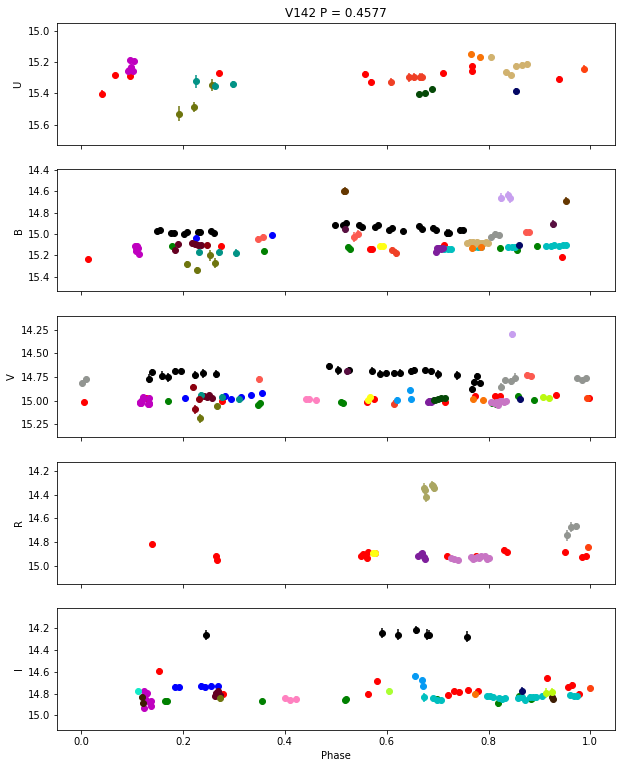

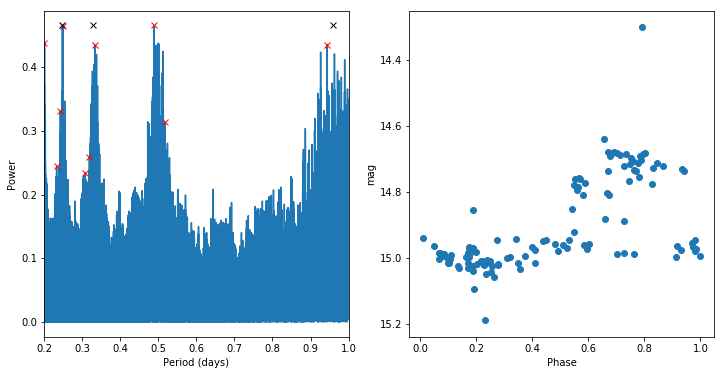

0.48921873096


In [150]:
### For single star
ind=124
print data['id'][ind], data['period'][ind]
lcv = data['id'][ind]
initial_period = data['period'][ind]
lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'

U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, initial_period, lcv, datasets, error_threshold=0.05, colors=colors)

# broad Lomb Scargle
new_guess = lightcurves.period_search_LS(V, lcv)
print new_guess

Star  Period  Period_new
V142 0.4577 0.48921253096


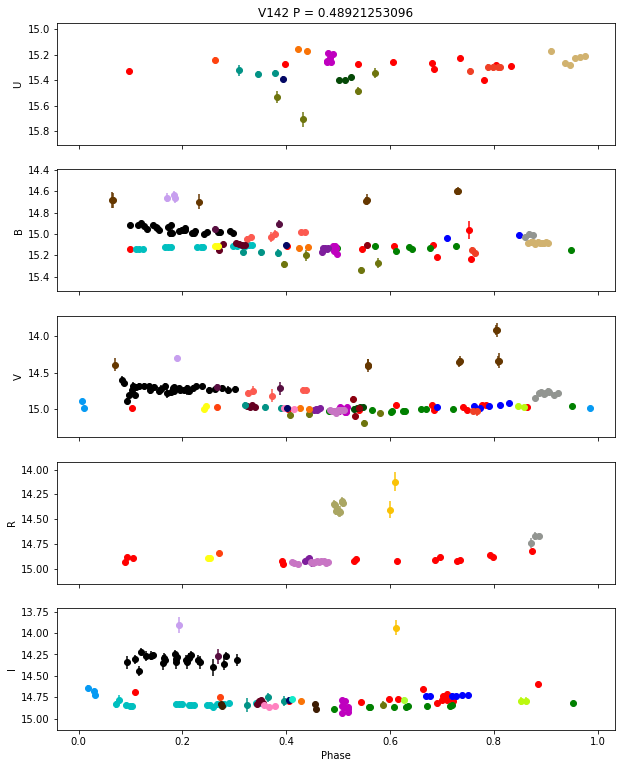

In [151]:
#period = lightcurves.period_search(V, initial_period, lcv, second_band=B, search_window=0.0005)
period = lightcurves.period_search(V, new_guess, lcv, second_band=B, search_window=0.0001)
print 'Star  Period  Period_new'
print lcv, initial_period, period
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, error_threshold=0.1, colors=colors)


In [135]:
lightcurves.plot_phased_optical_lcv(U, B, V, R, I, period, lcv, datasets, error_threshold=0.1, colors=colors, plot_save=1, data_dir=folder)



# Search for other variable candidates

In [152]:
center_ra, center_dec = coordinates.radec_string2deg(cluster_ra, cluster_dec)
catalog_data, dist = optical.read_fnl_w_radial_dist(optical_dir, target, center_ra, center_dec)

#dtype1 = np.dtype([('id', 'S8'), ('period', float), ('var_type', 'S5')])
dtype1 = np.dtype([('id', 'S8'), ('ra', 'S13'), ('dec', 'S13')])
data = np.loadtxt(folder+'PeterIDs.txt', dtype=dtype1, usecols=(0,9,10))

Reading optical catalog for NGC5904...
Finished reading optical catalog.


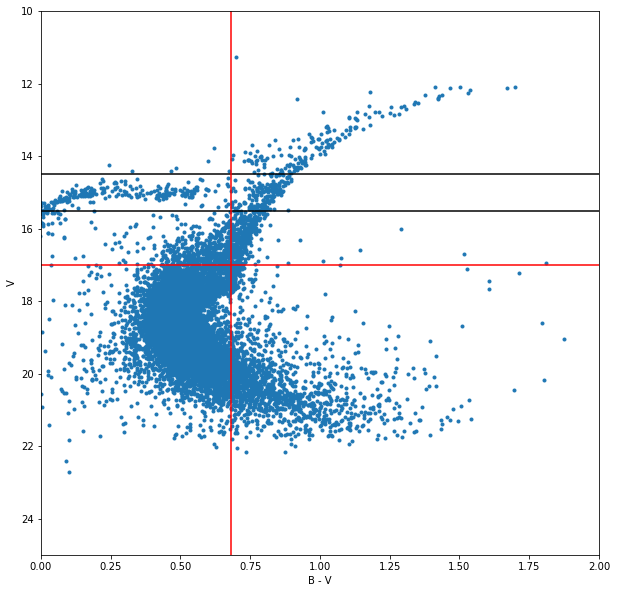

In [153]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')
# Define HB
HB_lower = 15.5
HB_upper = 14.5
mp.axhline(HB_lower, color='k')
mp.axhline(HB_upper, color='k')
#Define GB
GB_red = 0.68
GB_lower = 17.0
mp.axvline(GB_red, color='r')
mp.axhline(GB_lower, color='r')

98 candidate RRL stars.
13 candidate variables on GB.
6 other candidate variables.


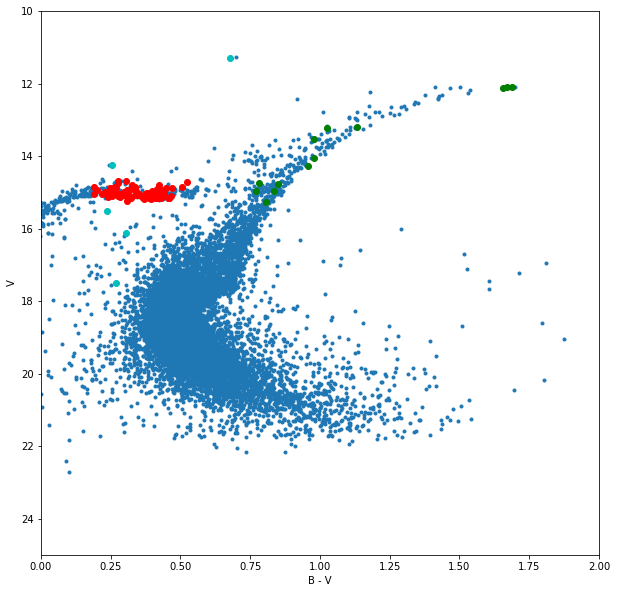

In [154]:
fig = mp.figure(figsize=(10,10))
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')

type_var = np.zeros(len(data['id']), dtype='S4')
for ind, lcv in enumerate(data['id']):
    
    lcv_file = folder+'lcvs/optical/'+target+lcv+'.lcv'
    try:
        U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
    except:
        type_var[ind] ='ND'
        continue

    color_var = np.nanmean(B[0]) - np.nanmean(V[0])
    mag_var = np.nanmean(V[0])

    
    if (mag_var <= HB_lower and mag_var >= HB_upper and color_var <= GB_red):
        type_var[ind] = 'RRL'
        mp.plot(color_var, mag_var, 'ro')
    elif (mag_var <= GB_lower and color_var >= GB_red):
        type_var[ind] = 'GB'
        mp.plot(color_var, mag_var, 'go')
    else:
        type_var[ind] = 'OTH'
        mp.plot(color_var, mag_var, 'co')

RRL_candidates = data['id'][type_var == 'RRL']
print str(len(RRL_candidates))+' candidate RRL stars.'
GB_variables = data['id'][type_var == 'GB']
print str(len(GB_variables))+' candidate variables on GB.'
other_variables = data['id'][type_var == 'OTH']
print str(len(other_variables))+' other candidate variables.'

In [155]:
for ind, star in enumerate(GB_variables):
    print ind, star, data['ra'][data['id'] == star], data['dec'][data['id'] == star]

0 V46 ['15:18:28.06'] ['2:6:1.3']
1 V48 ['15:18:29.31'] ['2:6:37.8']
2 V138 ['15:18:30.58'] ['2:5:39.4']
3 Tip1 ['15:18:31.6'] ['2:4:41.0']
4 V126 ['15:18:32.1'] ['2:5:3.1']
5 V122b ['15:18:32.12'] ['2:4:44.2']
6 V156 ['15:18:32.51'] ['2:4:57.6']
7 V135 ['15:18:32.62'] ['2:3:57.3']
8 V51 ['15:18:33.57'] ['2:7:4.9']
9 V108b ['15:18:33.9'] ['2:4:46.5']
10 Tip2 ['15:18:34.19'] ['2:6:25.2']
11 V50 ['15:18:36.04'] ['2:6:37.4']
12 V140 ['15:18:36.18'] ['2:5:12.7']


In [25]:
ind = 0
lcv_name = other_variables[ind]
#lcv_name = RRL_candidates[ind]
#lcv_name = 'V60'
lcv_file = folder+'lcvs/optical/'+target+lcv_name+'.lcv'
U, B, V, R, I = lightcurves.read_optical_lcv(lcv_file, old=0)
#print lcv_name, data['var_type'][ind], data['period'][ind]
#cc_period = data['period'][ind]
print lcv_name

V164


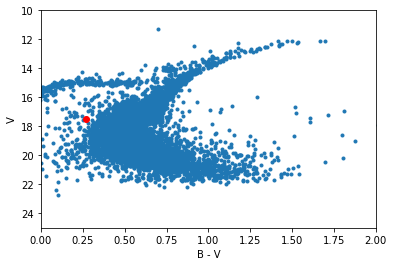

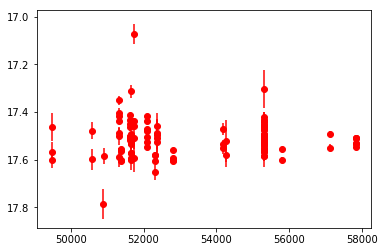

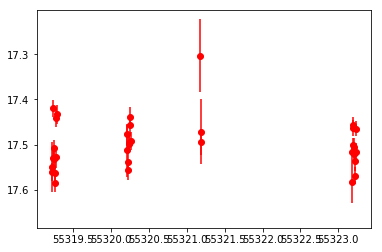

/Users/Jill/anaconda2/envs/astroconda/lib/python2.7/site-packages/ipykernel_launcher.py:50: VisibleDeprecationWarning: boolean index did not match indexed array along dimension 0; dimension is 114 but corresponding boolean dimension is 35


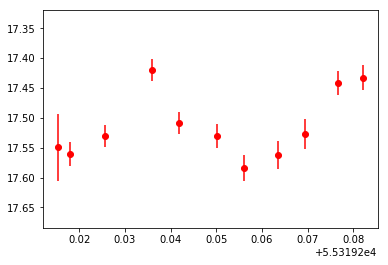

In [26]:
thres = 100
color = catalog_data['B'][dist < thres] - catalog_data['V'][dist < thres]
mag = catalog_data['V'][dist < thres]
scale = dist[dist < thres]
# ADD IN ERROR THRESHOLD
mp.scatter(color, mag, marker='.')
mp.ylim((25,10))
mp.xlim((0,2))
mp.xlabel('B - V')
mp.ylabel('V')


color_var = np.mean(B[0]) - np.mean(V[0])
mag_var = np.mean(V[0])
mp.plot(color_var, mag_var, 'ro')
mp.show()

# remove data with large error bars
error_threshold = 0.1
V[0][V[1] > error_threshold] = np.nan
V[1][V[1] > error_threshold] = np.nan

lightcurves.plot_raw_optical_lcv(V)

# Find best dataset to use
sources_prefix = np.zeros(len(V[3]), dtype='S30')
for ind, string in enumerate(V[3]):
    sources_prefix[ind] = string.split(':')[0]
sources, counts = np.unique(sources_prefix, return_counts=True)
best_source = sources[counts == np.max(counts)]

num_obs_in_run = len(V[0][sources_prefix == best_source])
longest_dataset = np.zeros((4, num_obs_in_run), dtype=object)
longest_dataset[0][:] = V[0][sources_prefix == best_source]
longest_dataset[1][:] = V[1][sources_prefix == best_source]
longest_dataset[2][:] = V[2][sources_prefix == best_source]
longest_dataset[3][:] = V[3][sources_prefix == best_source]

lightcurves.plot_raw_optical_lcv(longest_dataset)


# find night with the most data

obs_times = np.array(longest_dataset[2], dtype=float)
nights = np.round(obs_times, 0)
uniq_nights, counts = np.unique(nights, return_counts=True)
order = np.argsort(counts)
best_nights = uniq_nights[order]
best_night = uniq_nights[counts == np.max(counts)][0]
num_obs_in_night = len(V[2][nights == best_night])

longest_night = np.zeros((4, num_obs_in_night), dtype=object)
longest_night[0][:] = longest_dataset[0][nights == best_night]
longest_night[1][:] = longest_dataset[1][nights == best_night]
longest_night[2][:] = longest_dataset[2][nights == best_night]
longest_night[3][:] = longest_dataset[3][nights == best_night]


lightcurves.plot_raw_optical_lcv(longest_night)

In [28]:
candidate_periods = variables.candidate_variables(V, lcv_name, min_period=0.1, max_period=0.9, grid_num=1000)
#new_guess = lightcurves.period_search_LS(V, lcv_name)




NameError: name 'variables' is not defined

In [ ]:
for period in candidate_periods:
    if period == 0:
        continue
    lightcurves.plot_phased_optical_one_band(V, period, lcv_name, datasets)